In [1]:
# Setting up the Colab environment. DO NOT EDIT!
import os
#import warnings
#warnings.filterwarnings("ignore")

try:
    import otter, pingouin

except ImportError:
    ! pip install -q otter-grader==4.0.0, pingouin
    import otter

if not os.path.exists('lab-tests'):
    zip_files = [f for f in os.listdir() if f.endswith('.zip')]
    assert len(zip_files)>0, 'Could not find any zip files!'
    assert len(zip_files)==1, 'Found multiple zip files!'
    ! unzip {zip_files[0]}

grader = otter.Notebook(colab=True,
                        tests_dir = 'lab-tests')

# Lab

## Learning Objectives
At the end of this learning activity you will be able to:
 - Estimate the effect size given a set of confidence intervals.
 - Calculate the `effect_size`, `alpha`, `power`, and `sample_size` when given 3 of the 4. 
 - Interpret a power-plot of multiple experimental choices.
 - Calculate how changes in estimates of the experimental error impact sample size requirements.
 - Rigorously choose the appropriate experimental design for the best chance of success. 

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
sns.set_style('whitegrid')

## Step 1: Define the hypothesis

For this lab we are going to investigate a similar metric. 
We will imagine replicating the analysis considered in [Figure 3C](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6424628/figure/F3/).
This analysis considers the different sub-values of the vigalence index.
It shows that SK609 is improving attention by reducing the number of misses.

Copying the relevant part of the caption:

"Paired t-tests revealed that SK609 (4mg/kg; i.p.) specifically affected the selection of incorrect answers, significantly reducing the average number of executed misses compared to vehicle conditions (t(6))=3.27, p=0.017; **95% CI[1.02, 7.11])**."

Since this is a paired t-test we'll use the same strategy as the walkthrough.

## Step 2: Define success

### Q1: What is the average difference in misses between vehicle control and SK609 rodents?

_Hint: Calculate the center (average) of the confidence interval; the CI is **bolded** in the caption above._

Checked variables:
 * `q1_change` - A number indicating the average number of fewer missed prompts between treated and vehicle controls.


| **Total Points** | 5 |
|--------|----|
| Public Checks | 1 |

In [3]:
q1_change = (7.11+1.02)/2  # SOLUTION

print(f'On average, during an SK609 trial the rodent missed {q1_change} fewer prompts than vehicle controls.')

On average, during an SK609 trial the rodent missed 4.065 fewer prompts than vehicle controls.


In [4]:
print(f'q1_change = {q1_change:0.3}')

q1_change = 4.07


### Q2: Calculate the effect size.
_Hint: Use the change just defined in Q1._

Assume from our domain knowledge and inspection of the figure that there is an error of 3.5 misses.

Checked variables:
 * `q2_effect_size` - The cohen's-D effect size for this experiment.


| **Total Points** | 5 |
|--------|----|
| Public Checks | 1 |

In [5]:
error = 3.5

q2_effect_size = q1_change/error # SOLUTION

print(f'The normalized effect_size of SK609 is {q2_effect_size:0.3f}')

The normalized effect_size of SK609 is 1.161


In [6]:
print(f'q2_effect_size = {q2_effect_size:0.3}')

q2_effect_size = 1.16


## Step 3: Define your tolerance for risk

For this assignment consider that we want to have 80% chance of detecting a true effect and a 1% chance of falsely accepting an effect.

Checked variables:
 * `power` - The desired _power_.
 * `alpha` - The desired _alpha_ threshold.

| **Total Points** | 5 |
|--------|----|
| Public Checks | 2 |

In [7]:
power = 0.8  # SOLUTION
alpha = 0.01  # SOLUTION

In [8]:
print(f'power = {power:0.2}')

power = 0.8


In [9]:
print(f'alpha = {alpha:0.2}')

alpha = 0.01


## Step 4: Define a budget

In the figure caption we see that the paper used a nobs of 16 mice:

"Difference in VI measurements calculated against previous day vehicle performance in rats (n=16) showed SK609 improved sustained attention performance ..."

## Step 5: Calculate

### Q4: Calculate the minimum **change** detectable with 16 animals.

Use `alternative='two-sided'` as we do not know whether the number of misses is always increasing.

_Hint: Use the power-calculator, and then use that effect size to calculate the min_change._


Checked variables:
 * `q4_effect_size` - The minimum detectable effect size given N, alpha, and power.
 * `q4_min_change` - The minimum change in misses that we can detect.


| **Total Points** | 5 |
|--------|----|
| Public Checks | 2 |

In [10]:
# BEGIN SOLUTION NO PROMPT

q4e = pg.power_ttest(n = 16,
                     power = power,
                     alpha = alpha,
                     contrast = 'paired',
                     alternative = 'two-sided')
# END SOLUTION

q4_effect_size = q4e # SOLUTION


print('The effect size is:', q4_effect_size)

The effect size is: 0.9627048434364087


In [11]:
# What is the minimum change that we can detect at this power?

q4_min_change = q4_effect_size*error # SOLUTION

print(f'with 16 animals, one could have detected as few as {q4_min_change:0.2f} min change.')

with 16 animals, one could have detected as few as 3.37 min change.


In [12]:
print(f'q4_effect_size = {q4_effect_size:0.3}')

q4_effect_size = 0.963


In [13]:
print(f'q4_min_change = {q4_min_change:0.3}')

q4_min_change = 3.37


# Step 6: Summarize

Let's propose a handful of different considerations for our experiment.
As before, we'll keep the power and alpha the same, but we'll add the following experimental changes:

 - A grant reviewer has commented on the proposal and believes that your estimate of the error is too optimistic. They would like you to consider a scenario in which your error is **50% larger** than the current estimate.
 - A new post-doc has come from another lab that has a different attention assay. Their studies show that it has **25% less** error than the current one.
 
Consider these two experimental changes and how they effect sample size choices.

### Q5: Calculate new effect sizes for these conditions.

_Hint: Refer to the bolded experimental changes above and adjust the errors then the effect sizes, keeping in mind the q1_change variable._

_This can be done in two steps if needed._

Checked variables:
 * `q5_high_noise_effect_size` - The minimum detectable effect size in a high error consideration.
 * `q5_new_assay_effect_size` - The minimum detectable effect size in a new assay configuration.


| **Total Points** | 5 |
|--------|----|
| Public Checks | 2 |


In [14]:
q5_high_noise_effect_size = q1_change/(error + error*0.5) # SOLUTION
q5_new_assay_effect_size = q1_change/(error - error*0.25) # SOLUTION

print(f'Expected effect_size {q2_effect_size:0.2f}')
print(f'High noise effect_size {q5_high_noise_effect_size:0.2f}')
print(f'New assay effect_size {q5_new_assay_effect_size:0.2f}')

Expected effect_size 1.16
High noise effect_size 0.77
New assay effect_size 1.55


In [15]:
print(f'q5_high_noise_effect_size = {q5_high_noise_effect_size:0.3}')

q5_high_noise_effect_size = 0.774


In [16]:
print(f'q5_new_assay_effect_size = {q5_new_assay_effect_size:0.3}')

q5_new_assay_effect_size = 1.55


Use the power-plot below to answer the next question.

Text(0.5, 0, 'Sample Size')

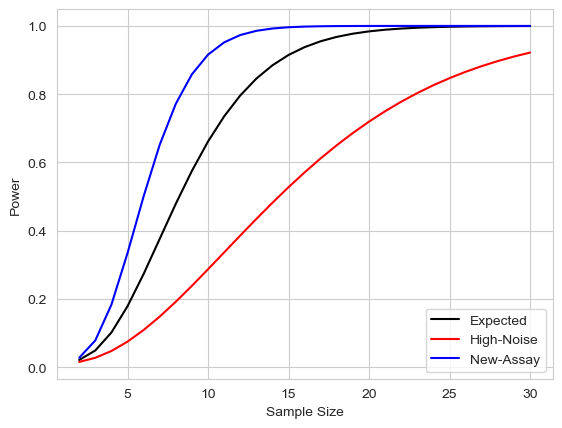

In [17]:

# Check many different nobs sizes
nobs_sizes = np.arange(1, 31)


names = ['Expected', 'High-Noise', 'New-Assay']
colors = 'krb'
effect_sizes = [q2_effect_size, q5_high_noise_effect_size, q5_new_assay_effect_size]

fig, ax = plt.subplots(1,1)

# Loop through each observation size
for name, color, effect in zip(names, colors, effect_sizes):
    # Calculate the power across the range
    powers = pg.power_ttest(d = effect,
                            n = nobs_sizes,
                            power = None,
                            alpha = alpha,
                            contrast = 'paired')

    ax.plot(nobs_sizes, powers, label = name, color = color)




ax.legend(loc = 'lower right')

ax.set_ylabel('Power')
ax.set_xlabel('Sample Size')

### Q6 Summary Questions

_Hint: Remember, the power level is 80%, so examine the nobs at 0.8 at the specified effect size to determine sufficient power of the question being asked._

Checked variables:
 * `q6a` - Would an experiment that had nobs=15 be sufficiently powered to detect an effect under the **expected** assumption? yes/no
 * `q6b` - Would an experiment that had nobs=15 be sufficiently powered to detect an effect under the **high-noise** assumption? yes/no
 * `q6c` - How many fewer animals could be used if the **new experiment** was implemented vs. the expected/current one (using 80% power)? (number)

| **Total Points** | 5 |
|--------|----|
| Included Checks | 3 |
| Hidden Tests    | 3 |

In [18]:
# Would an experiment that had nobs=15 be sufficiently powered
# to detect an effect under the expected assumption?
# 'yes' or 'no'
q6a = 'yes'  # SOLUTION

# Would an experiment that had nobs=15 be sufficiently powered
# to detect an effect under the high-noise assumption?
# 'yes' or 'no'
q6b = 'no'  # SOLUTION

# How many fewer animals could be used if the new experiment was implemented
# vs. the expected/current one (using 80% power)?
# Hint: Use the power calculator. Round up.

# BEGIN SOLUTION NO PROMPT
standard_num = pg.power_ttest(d = q2_effect_size,
                              n = None,
                              power = 0.8,
                              alpha = alpha,
                              contrast = 'paired')
print('Standard Assay:', standard_num)

new_assay_num = pg.power_ttest(d = q5_new_assay_effect_size,
                               n = None,
                               power = 0.8,
                               alpha = alpha,
                               contrast = 'paired')
print('New Assay:', new_assay_num)
print('Difference', np.ceil(standard_num-new_assay_num))
# END SOLUTION

q6c = np.ceil(standard_num-new_assay_num) # SOLUTION


Standard Assay: 12.070338571040132
New Assay: 8.28614624629786
Difference 4.0


In [19]:
print('q6a is a str:', isinstance(q6a, str))

q6a is a str: True


In [20]:
print('q6b is a str:', isinstance(q6b, str))

q6b is a str: True


In [21]:
print('q6c is a number:', isinstance(q6c, (int, float)))

q6c is a number: True


In [22]:
# HIDDEN
print(f'q6a = {q6a}')

q6a = yes


In [23]:
# HIDDEN
print(f'q6b = {q6b}')

q6b = no


In [24]:
# HIDDEN
print(f'q6c = {q6c:0.0f}')

q6c = 4


--------------------------------------------

In [25]:
grader.check_all()

## Submission

Check:
 - That all tables and graphs are rendered properly.
 - Code completes without errors by using `Restart & Run All`.
 - All checks **pass**.
 
Then save the notebook and the `File` -> `Download` -> `Download .ipynb`. Upload this file to BBLearn.